In [1]:
import pandas as pd
import sys
sys.path.append('../') 
import matplotlib.pyplot as plt
import seaborn as sns

# Import necessary functions
from src.loader import load_data
from src.clean import clean_data

# Load data
sql_query = '''
    
 SELECT * FROM xdr_data
 '''

df = load_data(sql_query)


In [2]:
# apply the cleaning function
df = clean_data(df)

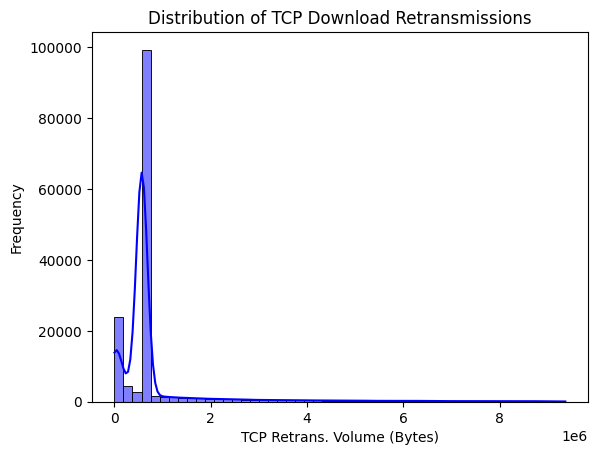

In [3]:
# Analyze TCP DL Retransmissions
sns.histplot(df['TCP DL Retrans. Vol (Bytes)'], bins=50, color='blue', kde=True)
plt.title('Distribution of TCP Download Retransmissions')
plt.xlabel('TCP Retrans. Volume (Bytes)')
plt.ylabel('Frequency')
plt.show()


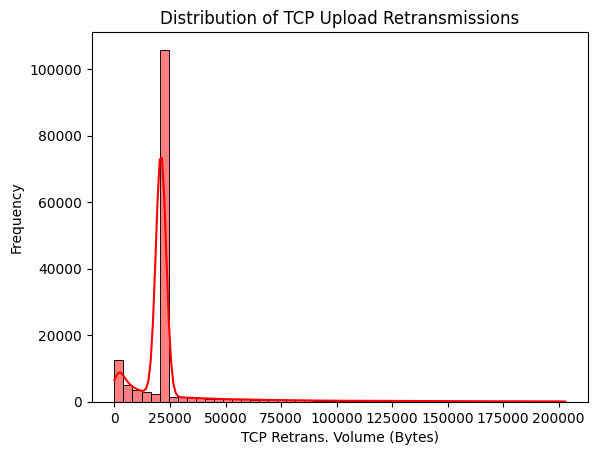

In [4]:
# Analyze TCP DL Retransmissions
sns.histplot(df['TCP UL Retrans. Vol (Bytes)'], bins=50, color='red', kde=True)
plt.title('Distribution of TCP Upload Retransmissions')
plt.xlabel('TCP Retrans. Volume (Bytes)')
plt.ylabel('Frequency')
plt.show()


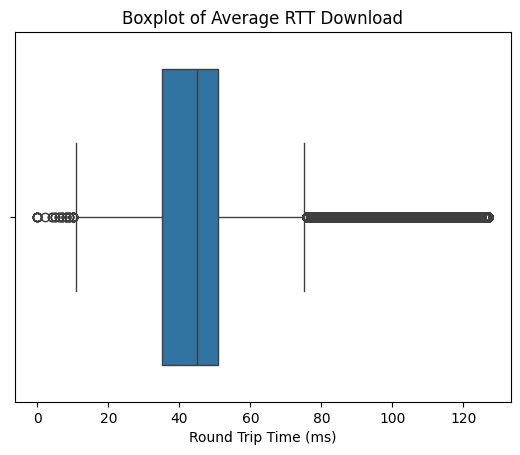

In [5]:
# Analyze Round Trip Time (RTT) DL
sns.boxplot(data=df, x='Avg RTT DL (ms)')
plt.title('Boxplot of Average RTT Download')
plt.xlabel('Round Trip Time (ms)')
plt.show()

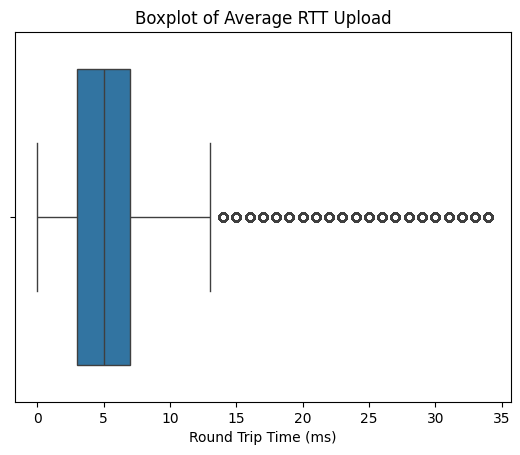

In [6]:

# Analyze Round Trip Time (RTT) UL
sns.boxplot(data=df, x='Avg RTT UL (ms)')
plt.title('Boxplot of Average RTT Upload')
plt.xlabel('Round Trip Time (ms)')
plt.show()


In [7]:
# Convert 'Start' and 'End' to datetime 
df['Start'] = pd.to_datetime(df['Start'])
df['End'] = pd.to_datetime(df['End'])

# create a separate time index if 'Start' does not work directly
df['Time Index'] = df['Start']  


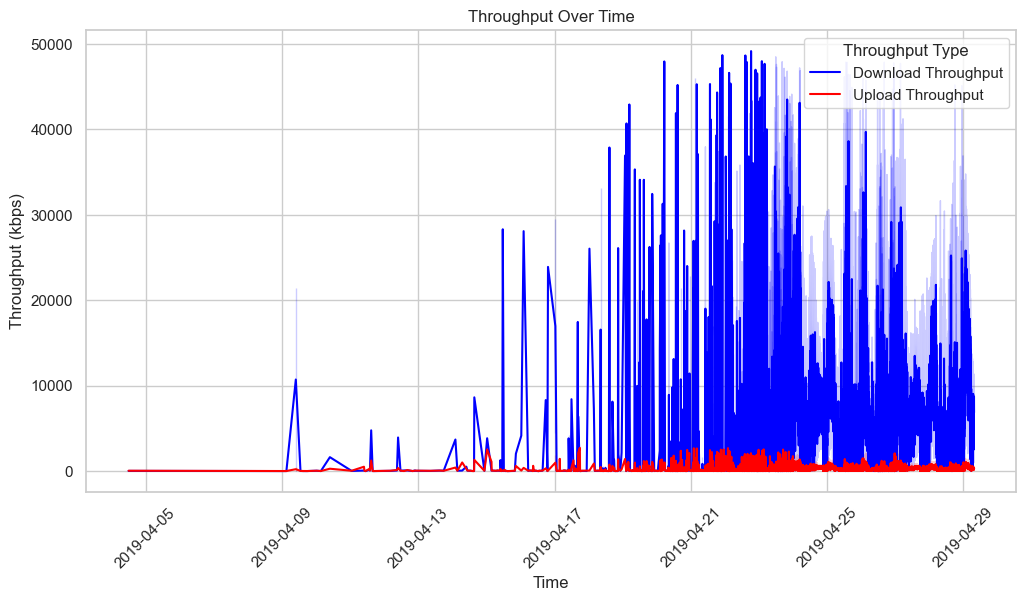

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure you use a seaborn style for better visuals
sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Time Index', y='Avg Bearer TP DL (kbps)', label='Download Throughput', color='blue')
sns.lineplot(data=df, x='Time Index', y='Avg Bearer TP UL (kbps)', label='Upload Throughput', color='red')
plt.title('Throughput Over Time')
plt.xlabel('Time')
plt.ylabel('Throughput (kbps)')
plt.legend(title='Throughput Type')
plt.xticks(rotation=45)  
plt.show()


/var/folders/xm/hbwsr__s2bnfkwhtlgztw7wm0000gn/T/ipykernel_1351/864974560.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_handsets.values, y=top_handsets.index, palette='viridis')


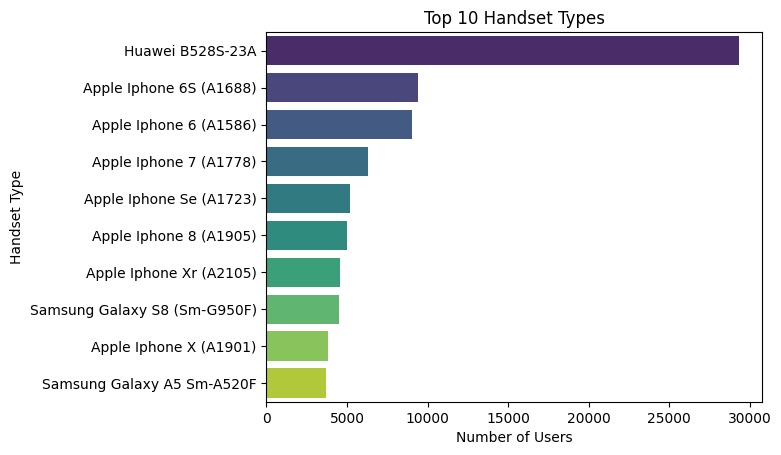

In [8]:
# Frequency of handset types
top_handsets = df['Handset Type'].value_counts().nlargest(10)
sns.barplot(x=top_handsets.values, y=top_handsets.index, palette='viridis')
plt.title('Top 10 Handset Types')
plt.xlabel('Number of Users')
plt.ylabel('Handset Type')
plt.show()
